In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [609]:
wine = pd.read_csv('Red Wine Qulaity Prediciton.csv')

In [610]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [611]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [612]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [613]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [614]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [615]:
wine.loc[(wine['quality']>=6),'Quality'] = 1
wine.loc[(wine['quality']<6),'Quality'] = 0

In [616]:
wine.drop('quality',axis=1,inplace=True)

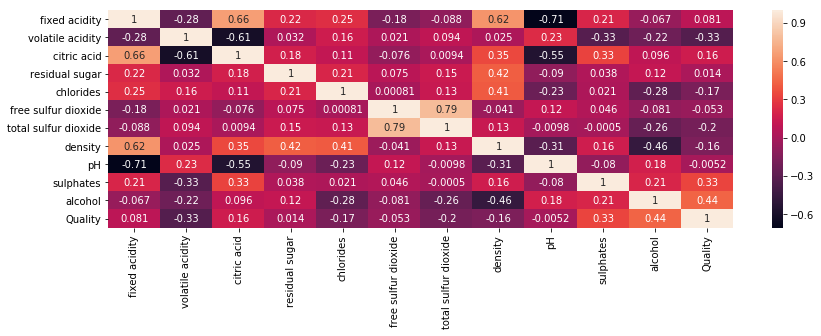

In [617]:
plt.figure(figsize=(14,4))
sns.heatmap(wine.corr(method='spearman'),annot=True)

In [618]:
X=wine.iloc[:,0:11]
y=wine.iloc[:,11:12]

In [619]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [620]:
winescores = pd.DataFrame(fit.scores_)
winecolumns = pd.DataFrame(X.columns)

In [621]:
final = pd.concat([winecolumns,winescores],axis=1)
final.columns = ['Features','Scores']

In [622]:
final

,Features,Scores
0,fixed acidity,5.265257
1,volatile acidity,10.029710
2,citric acid,5.666703
3,residual sugar,0.005840
4,chlorides,0.485196
5,free sulfur dioxide,42.005907
6,total sulfur dioxide,2002.305900
7,density,0.000145
8,pH,0.000123
9,sulphates,3.317617


In [623]:
print(final.nlargest(10,'Scores'))

                Features       Scores
6   total sulfur dioxide  2002.305900
5    free sulfur dioxide    42.005907
10               alcohol    32.908633
1       volatile acidity    10.029710
2            citric acid     5.666703
0          fixed acidity     5.265257
9              sulphates     3.317617
4              chlorides     0.485196
3         residual sugar     0.005840
7                density     0.000145


In [624]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

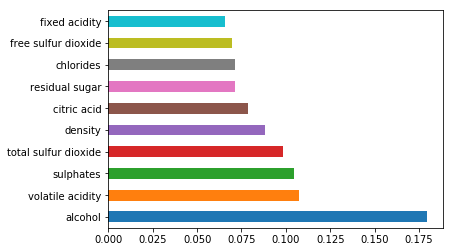

In [625]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [626]:
df1=wine[['total sulfur dioxide','free sulfur dioxide','alcohol','volatile acidity','Quality']]
df2=wine[['total sulfur dioxide','free sulfur dioxide','alcohol','volatile acidity','sulphates','density','fixed acidity','Quality']]
df3=wine[['volatile acidity','citric acid','chlorides','total sulfur dioxide','alcohol','density','sulphates','Quality']]

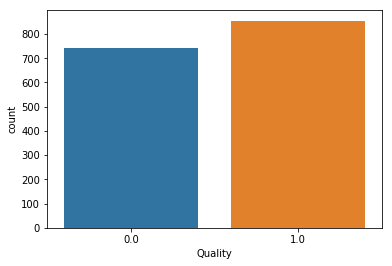

In [627]:
sns.countplot(x='Quality',data=wine)

In [628]:
#Probable Approach to remove Outliers if necessary using z-score
outliers = []
def detect_outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    threshold = 3
    
    for i in data:
        z = (i-mean)/std
        if np.abs(z)>threshold:
            outliers.append(i)
    return outliers    
    

In [629]:
from sklearn.model_selection import train_test_split
X1=df1.drop('Quality',axis=1)
y1=df1['Quality']
X2=df2.drop('Quality',axis=1)
y2=df2['Quality']
X3=df3.drop('Quality',axis=1)
y3=df3['Quality']
X4=wine.drop('Quality',axis=1)
y4=wine['Quality']

In [630]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)

In [631]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [632]:
predictions1 = rf.predict(X_test1)
print(classification_report(y_test1, predictions1))
print(confusion_matrix(y_test1,predictions1))
print(accuracy_score(y_test1,predictions1))

             precision    recall  f1-score   support

        0.0       0.72      0.77      0.75       238
        1.0       0.80      0.76      0.78       290

avg / total       0.77      0.76      0.76       528

[[184  54]
 [ 71 219]]
0.7632575757575758


In [633]:
rf.fit(X_train2,y_train2)
predictions2 = rf.predict(X_test2)
print(classification_report(y_test2, predictions2))
print(confusion_matrix(y_test2,predictions2))
print(accuracy_score(y_test2,predictions2))

             precision    recall  f1-score   support

        0.0       0.72      0.76      0.74       238
        1.0       0.79      0.76      0.77       290

avg / total       0.76      0.76      0.76       528

[[180  58]
 [ 71 219]]
0.7556818181818182


In [634]:
rf.fit(X_train3,y_train3)
predictions3 = rf.predict(X_test3)
print(classification_report(y_test3, predictions3))
print(confusion_matrix(y_test3,predictions3))
print(accuracy_score(y_test3,predictions3))

             precision    recall  f1-score   support

        0.0       0.72      0.75      0.74       238
        1.0       0.79      0.77      0.78       290

avg / total       0.76      0.76      0.76       528

[[179  59]
 [ 68 222]]
0.759469696969697


In [635]:
rf.fit(X_train4,y_train4)
predictions4= rf.predict(X_test4)
print(classification_report(y_test4, predictions4))
print(confusion_matrix(y_test4,predictions4))
print(accuracy_score(y_test4,predictions4))

             precision    recall  f1-score   support

        0.0       0.74      0.79      0.77       238
        1.0       0.82      0.78      0.80       290

avg / total       0.78      0.78      0.78       528

[[188  50]
 [ 65 225]]
0.7821969696969697
